<a href="https://colab.research.google.com/github/SamariaSpringfield/MAT421_/blob/main/chapter17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Interpolation**

*Chapter 17.1-5*

Assume we have a data set consisting of independent values denoted as *xi* and dependent values *yi* where *i* = 0, ... , *n*. We will interpolate the value of x* in order to predict the function y(x) or the **interpolation function**.

Interpolation informs the user without requring an underlying model for the data.

We will use python to explore interpolation.

**Example 1** *Find the interpolation at x = 8 on the data x = [7, 8, 9] and y = [9, 8, 6] using python.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [7, 8, 9]
y = [9, 8, 6]

x_new = 8.0
y_new = np.interp(x_new, x, y)
print(y_new)
     

8.0


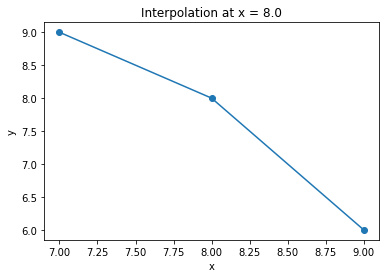

In [ ]:
plt.plot(x, y, 'o-')
plt.title('Interpolation at x = 8.0')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Linear Interpolation**

Linear interpolation estimates for a point to exist on the line between the neighboring right and left points.

**Example 2** *Find the linear interpolation at x = 2.5 based on data x = [1, 4, 5], y = [3, 6, 7]. Create a graph.*

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
x = [1, 4, 5]
y = [3, 6, 7]

f = interp1d(x, y)
y_hat = f(3.5)
print(y_hat)
     

5.5


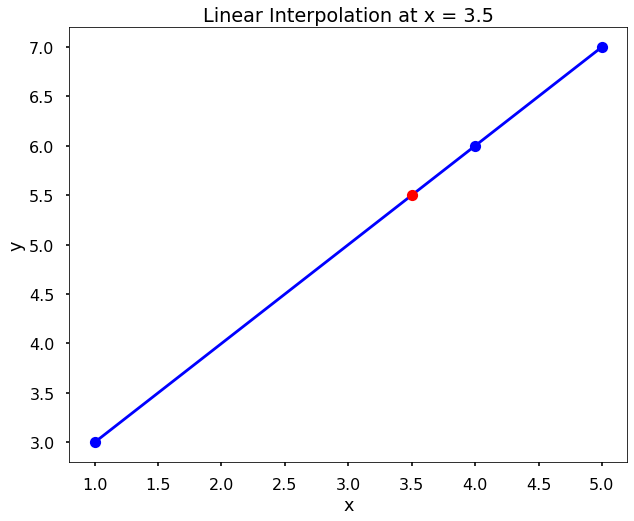

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(x, y, '-ob')
plt.plot(3.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 3.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**Cubic Spline Interpolation**

Cubic spine interpolation assumes the interpolating function is a set of piecewise cubic functions.


**Example 3** *Use CubicSpline to plot the cubic spline interpolation of the data set x = [1, 5, 7] and y = [3, 4, 6] for 0 ≤ 𝑥 ≤ 7*
.

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = [1, 5, 7]
y = [3, 4, 6]

f = CubicSpline(x, y, bc_type = 'natural')
x_new = np.linspace(0, 7, 100)
y_new = f(x_new)

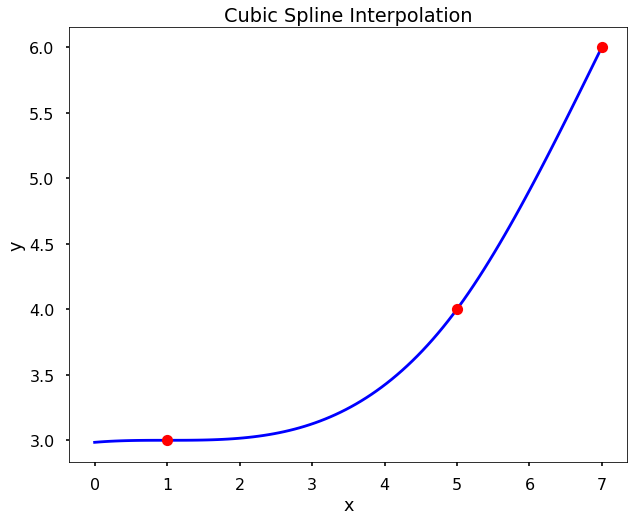

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Lagrange Polynomial Interpolation

Rather than finding the equation between a subsequient, fixed number of points, Lagrange Polynomial Interpolation defines a polynomial that goes through every data point.

Lagrange Interpolation should never be used to estimate the polynomial outside of the range of the given points as the function will quickly grow and unbounded the region.

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

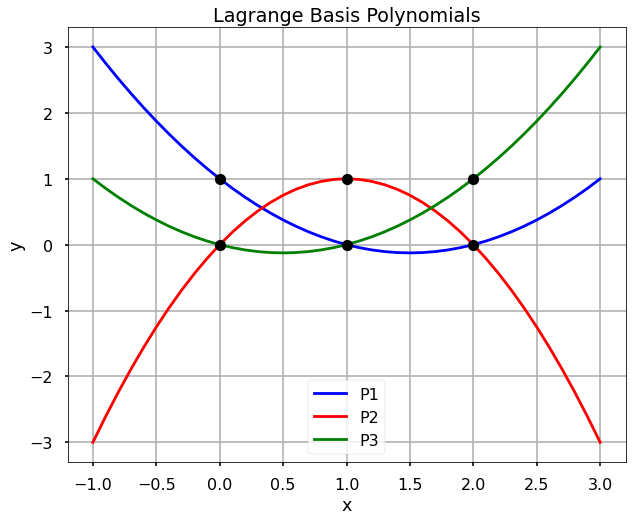

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Now we will compute and plot a Lagrange polynomial ensuring it goes through every given point.


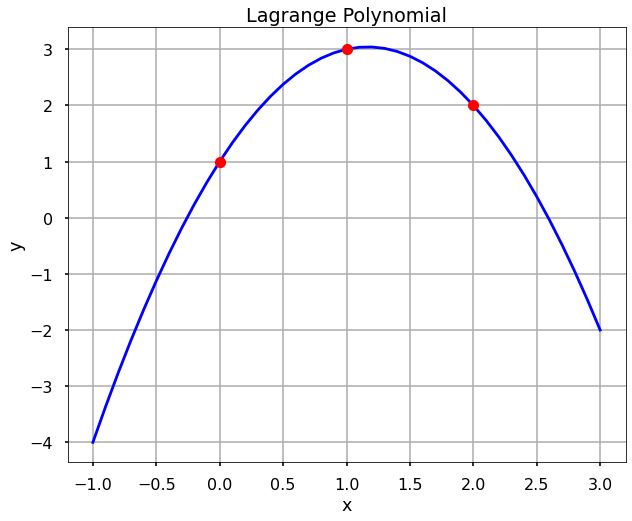

In [ ]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
